In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

In [5]:
def read_csfile(csfile):
    content = np.array(np.load(csfile).tolist())
    dtype   = np.load(csfile).dtype
    header = []
    for key in dtype.fields.keys():
        header.append(key)
    header = np.array(header)
    return header, content

In [6]:
particle_file = '/Users/Expo/Desktop/Cryo-EM/Project/cryoem-analysis-tools/data/P15_J35_passthrough_particles.cs'

In [ ]:
header, content = read_csfile(particle_file)

In [ ]:
header

In [ ]:
content.shape

In [ ]:
content[:10,1]

In [9]:
mic1 = np.where(content[:,1]==content[0,1])

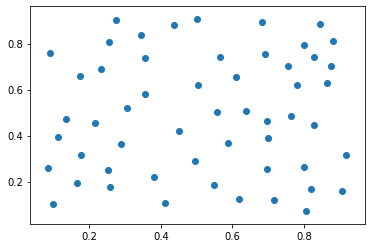

In [10]:
plt.scatter(content[mic1,5],content[mic1,6])
plt.show()

In [12]:
# Array of the distances to the nearest neighbor
min_distances = []

# For every point b in the set compute the distance from it to every other point in the set
for b in mic1[0]:
    location = (content[b, 5], content[b, 6])
    distances = []
    for n in mic1[0]:
        if b != n:
            n_location = (content[n, 5], content[n, 6])
            dist = np.sqrt((location[0]-n_location[0])**2 + (location[1]-n_location[1])**2)
            distances.append(dist)
    # Find the minimum distance and add it to the min_distances list
    min_distances.append(min(distances))
    
print(min_distances)

[0.08141312770360494, 0.13682357916245344, 0.09666353008429537, 0.08231405743433201, 0.08816101606807407, 0.07783754723744624, 0.07614690073802996, 0.07533867830639879, 0.10436714803939229, 0.07974772871266068, 0.0810223822981975, 0.09446486111377957, 0.11634439100030529, 0.09954170359569714, 0.0754597825528635, 0.08504244712535641, 0.11817656011377257, 0.11238948282114013, 0.08816101606807407, 0.09446486111377957, 0.12952583938985837, 0.09923754547009213, 0.12950972366137045, 0.08127858882587152, 0.11634439100030529, 0.09523784726506321, 0.07783754723744624, 0.13818249567775648, 0.07875439937689123, 0.09968371090667404, 0.06879700764571145, 0.08377802364595828, 0.11581977185635034, 0.06753182977827275, 0.06808435818048844, 0.09291292526035422, 0.097940377894478, 0.11454575362146995, 0.09573550116832873, 0.11416051333667772, 0.10221375247127952, 0.09291292526035422, 0.0810223822981975, 0.07875439937689123, 0.06808435818048844, 0.06753182977827275, 0.09954170359569714, 0.082314057434332

In [24]:
loc = list(zip(content[mic1,5][0], content[mic1,6][0]))
distances = euclidean_distances(loc, loc)


NameError: name 'euclidean_distances' is not defined

In [ ]:
X = np.array([zip(content[mic1,5][0], content[mic1,6][0])])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)